In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Loss function

* Let $(\mathbf{x}^{(1)}, y^{(1)}), (\mathbf{x}^{(2)}, y^{(2)}), \ldots, (\mathbf{x}^{(n)}, y^{(n)})$ denote a dataset with $n$ examples, where each observation $\mathbf{x}^{(i)}$ corresponds to the target $y^{(i)}$.

* Let the vector $\mathbf{w}$ denote the parameters of a model that attempts to predict targets given observations.

* Let $l^{(i)}$ denote the loss function for the $i$-th example, so that the loss function $L$ is given by

$$ L(\mathbf{w}) = \frac{1}{n}\sum_{i = 1}^n l^{(i)}(\mathbf{w}). $$



# Stochastic Gradient Descent

* For a given a parameter vector $\mathbf{w}$, recall that the update computed by gradient descent is given by

$$ \mathbf{w} \gets \mathbf{w} - \eta \nabla L(\mathbf{w}), $$

where $\eta$ is the learning rate.

* Furthermore, recall that the gradient $\nabla L$ of the loss function $L$ is given by

$$ \nabla L(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^n \nabla l^{(i)}(\mathbf{w}). $$

* Therefore, if the dataset has many examples (if $n$ is large), computing $\nabla L(\mathbf{w})$ can be expensive.

* Stochastic gradient descent (SGD) approximates $\nabla L$ using a randomly chosen example in the dataset. If $i \in \{1, \ldots, n\}$ denotes the index of the chosen example, the update computed by stochastic gradient descent is given by

$$ \mathbf{w} \gets \mathbf{w} - \eta \nabla l^{(i)}(\mathbf{w}). $$


* Minibatch stochastic gradient descent approximates $\nabla L$ using a random subset of examples in the dataset:
    0. Initialize the parameters $\mathbf{w}$ arbitrarily.
    1. Sample a random set of indices $\mathcal{B}$ (minibatch), each between $1$ and $n$.
    2. Compute the gradient of the loss function for the $i$-th example $\nabla l^{(i)}(\mathbf{w})$ , for each $i \in \mathcal{B}$.
    3. Compute the average of these gradients to obtain an approximation of $\nabla L(\mathbf{w})$.
    4. Multiply the resulting vector by the learning rate and then subtract it from the current parameters $\mathbf{w}$ to obtain new parameters $\mathbf{w}$:

    $$ \mathbf{w} \gets \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \nabla l^{(i)}(\mathbf{w}) .$$

    5. Return to Step 1.

# Issues with a single learning rate

* During each iteration of (minibatch stochastic) gradient descent, a single learning rate controls how much each element of the parameter vector $\mathbf{w}$ changes.

* We will use a simplified example to illustrate the issues with this approach.

* Let $\mathbf{w} = [w_1, w_2]^T$ and suppose that the loss function $L$ is given by

$$ L(\mathbf{w}) = 0.1 w_1^2 + 2 w_2^2,$$

so that

$$ \nabla L(\mathbf{w}) = [ 0.2 w_1, 4 w_2]^T.$$

* Note that $L$ reaches its minimum when $\mathbf{w} = [0, 0]^T$.

* The code below computes and displays the path taken by gradient descent with a learning rate $\eta = 0.4$.


In [ ]:
# You do not need to understand this cell

# A simple "loss function" `l`
def l(w1, w2):
    return (0.1 * w1**2) + (2 * w2**2)

# The gradient of `l` at `w`
def gradl(w):
    return np.array([0.2 * w[0], 4 * w[1]])

# Plots the path taken by gradient descent
def plot_path(path):
    minx, maxx = min(path[:, 0]), max(path[:, 0])
    miny, maxy = min(path[:, 1]), max(path[:, 1])

    # Computing the value of `l` over a grid
    w1s = np.linspace(minx - 1, maxx + 1, 101)
    w2s = np.linspace(miny - 1, maxy + 1, 101)
    W1, W2 = np.meshgrid(w1s, w2s)
    L = l(W1, W2)

    plt.figure(figsize=(12, 6))

    # Contour plot
    plt.subplot(1, 2, 1)
    contour = plt.contour(W1, W2, L, 25, cmap='viridis')
    plt.colorbar(contour)
    plt.scatter(path[:, 0], path[:, 1], color='red')
    plt.plot(path[:, 0], path[:, 1], color='red', linestyle='--')
    plt.title('Contour plot')
    plt.xlabel('w1')
    plt.ylabel('w2')

    # Surface plot
    ax = plt.subplot(1, 2, 2, projection='3d')
    surface = ax.plot_surface(W1, W2, L, cmap='viridis')
    plt.colorbar(surface)
    ax.set_title('Surface plot')
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')

    plt.tight_layout()
    plt.show()

    print(f'Optimizer stopped at w = ({path[-1, 0]:.5f}, {path[-1, 1]:.5f}).')

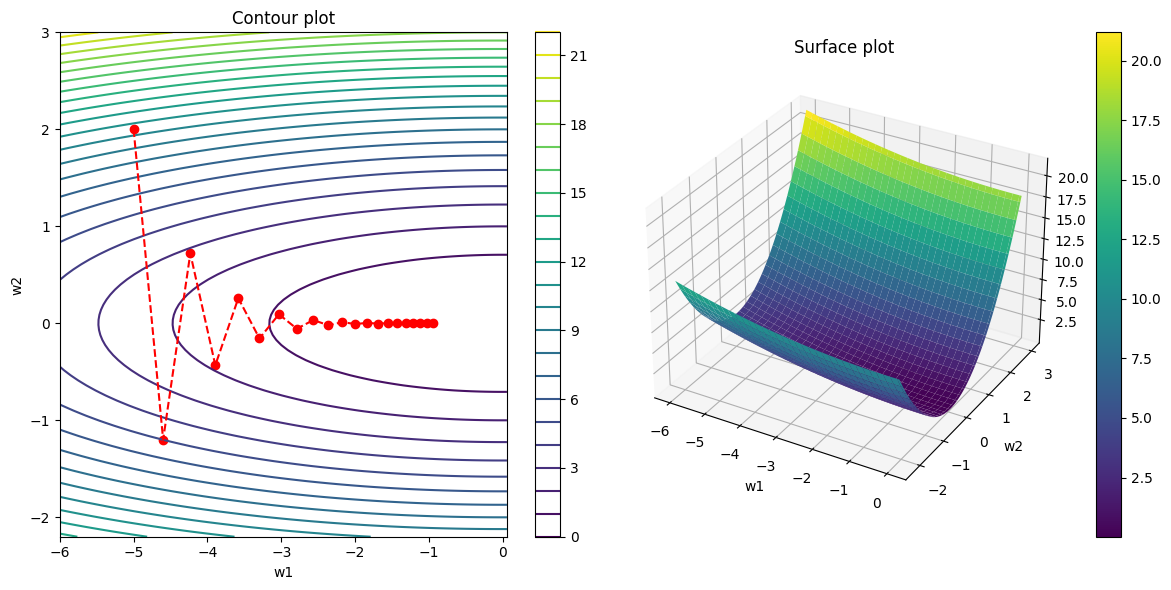

Optimizer stopped at w = (-0.94347, 0.00007).


In [ ]:
# Implements gradient descent
def gradient_descent(init, lr=0.4, iterations=20):
    w = np.array(init)
    path = [w]

    for i in range(iterations):
        w = w - lr * gradl(w)
        path.append(w)

    return np.array(path)

# You can change the following line to try different learning rates, such as 0.1 or 0.5.
learning_rate = 0.4

path = gradient_descent(init=[-5, 2], lr=learning_rate, iterations=20)
plot_path(path)

* Note how $w_1$ changes too slowly (so that it does not get close to zero) and how $w_2$ changes too quickly (so that it oscilates in early iterations).

* This is due to the difference in magnitude between of $\partial L/ \partial w_1$ and $\partial L / \partial w_2$.

* You can use the code above to experiment with different learning rates, such as $0.1$ and $0.5$.

* Note how small learning rates lead to slow progresss in the $w_1$ direction and how large learning rates cause divergence.

* This example illustrates why having a single learning rate that controls how much each element of the parameter vector $\mathbf{w}$ changes is not ideal.

* A natural idea is to have an independent learning rate for each element of the parameter vector $\mathbf{w}$.

* However, it would be difficult to set each of these learning rates appropriately.


# The Momentum Method

* In momentum-based (minibatch stochastic) gradient descent, each element of the parameter vector $\mathbf{w}$ has a corresponding velocity.

* Let $\mathbf{v}_0 = \mathbf{0}$ be the initial velocity vector, which has as many elements as the parameter vector.

* If $\mathbf{w}_t$ denotes the parameter vector at the start of the $t$-th iteration of (minibatch stochastic) gradiente descent, the velocity vector $\mathbf{v}_t$ for the $t$-th iteration is given by

$$ \mathbf{v}_{t} = \beta \mathbf{v}_{t-1} + \mathbf{g}_t,$$

where $\beta$ is a hyperparameter called momentum factor and $\mathbf{g}_t$ is (an estimate of) the gradient $\nabla L (\mathbf{w}_{t-1})$.

* The update computed by momentum-based (minibatch stochastic) gradient descent is given by

$$ \mathbf{w}_t = \mathbf{w}_{t-1} - \eta \mathbf{v}_t, $$

where $\eta$ is the learning rate.

* Intuitively, the momentum method remembers the velocity of each parameter, allowing larger updates when the direction of decrease in loss is consistent over many iterations.

* The momentum factor $\beta \in [0, 1]$ controls the effect of the previous velocity on the next velocity, and $1 - \beta$ is commonly interpreted as a coefficient of friction.

* If $\beta = 0$, momentum-based (minibatch stochastic) gradient descent is equivalent to (minibatch stochastic) gradient descent.

* Returning to the previous example, the code below computes and displays the path taken by momentum-based gradient descent with a learning rate $\eta = 0.6$ and a momentum factor $\beta = 0.5$.




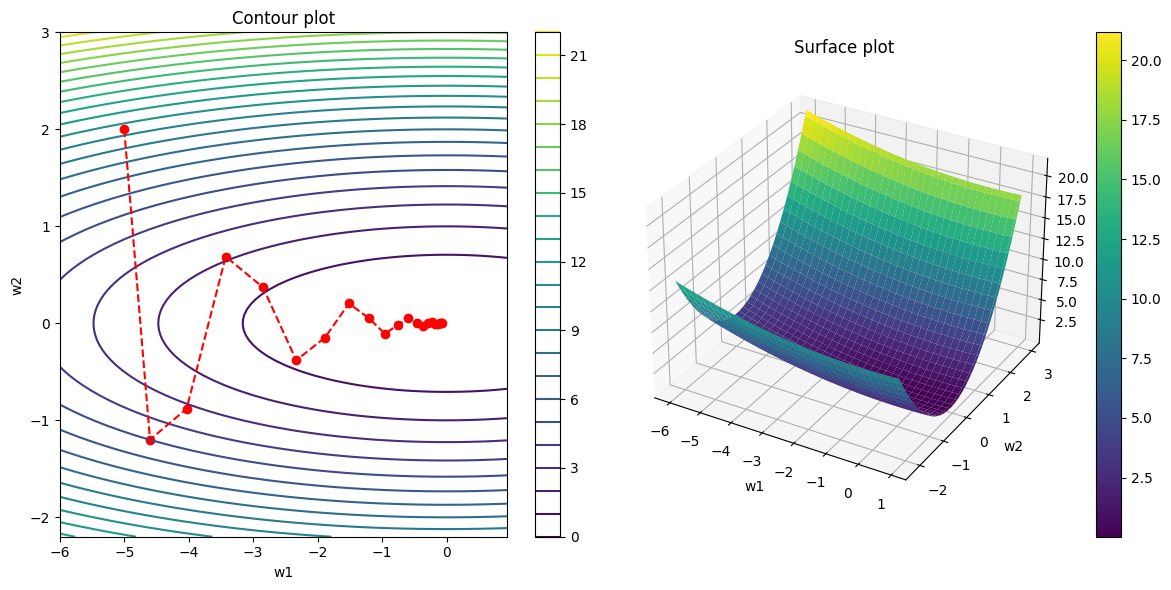

Optimizer stopped at w = (-0.06284, -0.00120).


In [ ]:
# Implements momentum-based gradient descent
def momentum(init, lr=0.4, beta=0.5, iterations=20):
    w = np.array(init)
    v = np.zeros(2)
    path = [w]

    for i in range(iterations):
        v = beta * v + gradl(w)
        w = w - lr * v
        path.append(w)

    return np.array(path)

# You can change the following lines to try different learning rates (such as 0.1 and 0.4) and momentum factors (such as 0.0 and 0.1)
learning_rate = 0.4
beta = 0.5

path = momentum(init=[-5, 2], lr=learning_rate, beta=beta, iterations=20)
plot_path(path)

* You can use the code above to experiment with different learning rates (such as 0.1 and 0.4) and momentum factors (such as 0.0 and 0.1)

* Note how the momentum method achieves better results for the same learning rate, and enables using a much larger learning rate before divergence.

# RMS-Prop

* Root mean squared propagation (RMS-Prop) is an optimization method that effectively adapts the learning rate for each element of the parameter vector $\mathbf{w}$.

* Let $\mathbf{s}_0 = \mathbf{0}$ be the initial state vector, which has as many elements as the parameter vector.

* If $\mathbf{w}_t$ denotes the parameter vector at the start of the $t$-th iteration of RMS-Prop, the state vector $\mathbf{s}_t$ for the $t$-th iteration is given by

$$ \mathbf{s}_t = \gamma \mathbf{s}_{t-1} + (1 - \gamma) \mathbf{g}_t^2, $$

where $\gamma \in [0, 1)$ is a hyperparameter and $\mathbf{g}_t$ is (an estimate of) the gradient $\nabla L (\mathbf{w}_{t-1})$, which is squared elementwise to give $\mathbf{g}_t^2$.

* Intuitively, the state vector $\mathbf{s}_t$ is an (exponential) moving average of the elementwise square of past gradients.

* Let $\odot$ denote elementwise multiplication. The update computed by RMS-Prop is given by

$$ \mathbf{w}_t = \mathbf{w}_{t-1} - \frac{\eta}{\sqrt{\mathbf{s}_{t} + \epsilon}} \odot \mathbf{g}_t, $$

where $\eta$ is the learning rate, $\epsilon > 0$ is a small constant that prevents division by zero, and $\mathbf{g}_t$ is (an estimate of) the gradient $\nabla L (\mathbf{w}_{t-1})$. Typically, $\epsilon = 10^{-6}$.

* Intuitively, the effective learning rate for each element of the parameter vector is small it the magnitude of the corresponding partial derivative of the loss has been large, and large if the magnitude of the corresponding partial derivative of the loss has been small.


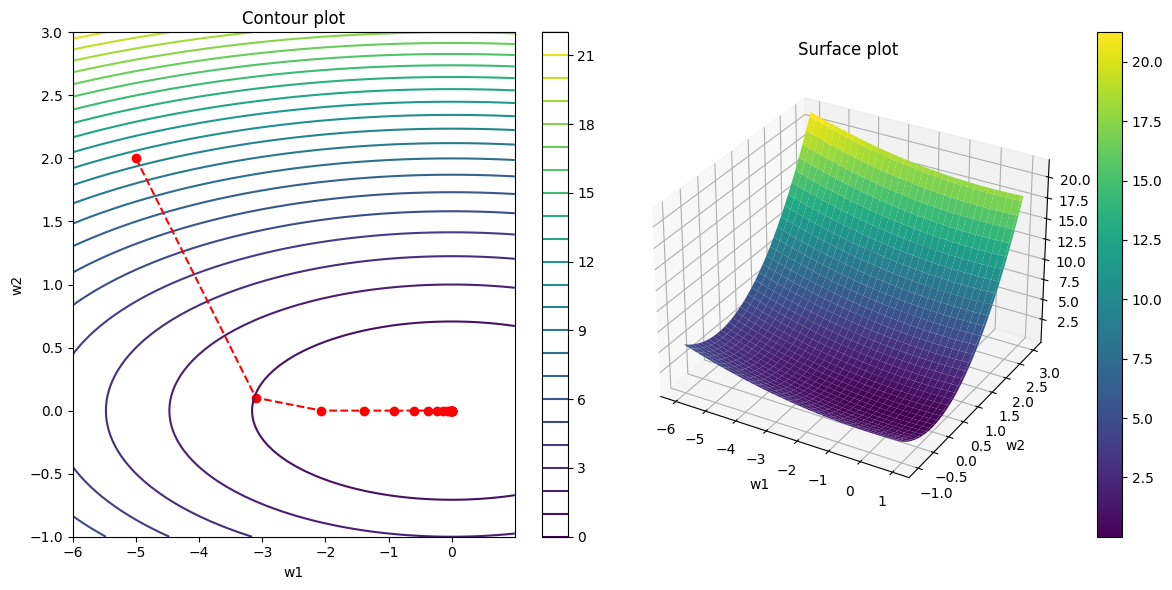

Optimizer stopped at w = (-0.00000, 0.00000).


In [ ]:
# Implements RMS-Prop
def rms_prop(init, lr=0.5, gamma=0.9, iterations=20, epsilon=1e-6):
    w = np.array(init)
    s = np.zeros(2)
    path = [w]

    for i in range(iterations):
        grad = gradl(w)
        s = gamma * s + (1 - gamma) * (grad**2)
        w = w - (lr / (np.sqrt(s + epsilon))) * grad
        path.append(w)

    return np.array(path)

# You can change the following lines to try different learning rates (such as 0.3 and 0.9) and gammas
learning_rate = 0.6
gamma = 0.9

path = rms_prop(init=[-5, 2], lr=learning_rate, gamma=gamma, iterations=20)
plot_path(path)

# Adam

* Adaptive moment estimation (Adam) combines the momentum method with RMS-Prop.

* Let $\mathbf{v}_0 = \mathbf{0}$ be the initial velocity vector and $\mathbf{s}_0 = \mathbf{0}$ be the initial state vector, each of which has as many elements as the parameter vector.

* If $\mathbf{w}_t$ denotes the parameter vector at the start of the $t$-th iteration of Adam, the velocity vector $\mathbf{v}_t$ and the state vector $\mathbf{s}_t$ for the $t$-th iteration are given by

$$
\begin{aligned}
\mathbf{v}_t &= \beta_1 \mathbf{v}_{t-1} + (1 - \beta_1) \mathbf{g}_t, \\
\mathbf{s}_t &= \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2) \mathbf{g}_t^2,
\end{aligned}$$

where $\beta_1$ and $\beta_2$ are hyperparameters and $\mathbf{g}_t$ is (an estimate of) the gradient $\nabla L (\mathbf{w}_{t-1})$, which is squared elementwise to give $\mathbf{g}_t^2$.

* Because the hyperparameters $\beta_1$ and $\beta_2$ are typically close to $1$ (such as $\beta_1 = 0.9$ and $\beta_2 = 0.999$) and $\mathbf{v}_0 = \mathbf{s}_0 = \mathbf{0}$, the vectors defined above are strongly biased towards zero.

* At a given iteration $t$, Adam addresses this bias by employing a normalized velocity vector $\hat{\mathbf{v}}_t$ and a normalized state vector $\hat{\mathbf{s}}_t$ defined by
$$
\begin{aligned}
 \hat{\mathbf{v}}_t &= \frac{\mathbf{v}_t}{1 - \beta_1^t}, \\
 \hat{\mathbf{s}}_t &= \frac{\mathbf{s}_t}{1 - \beta_2^t}.
\end{aligned}
$$

* Finally, the update computed by Adam is given by

$$ \mathbf{w}_t = \mathbf{w}_{t-1} - \frac{\eta}{\sqrt{\hat{\mathbf{s}}_{t}} + \epsilon} \odot \hat{\mathbf{v}}_t, $$

where $\epsilon > 0$ is a small constant that prevents division by zero (used slightly differently than in RMS-Prop). Typically, $\epsilon = 10^{-6}$.



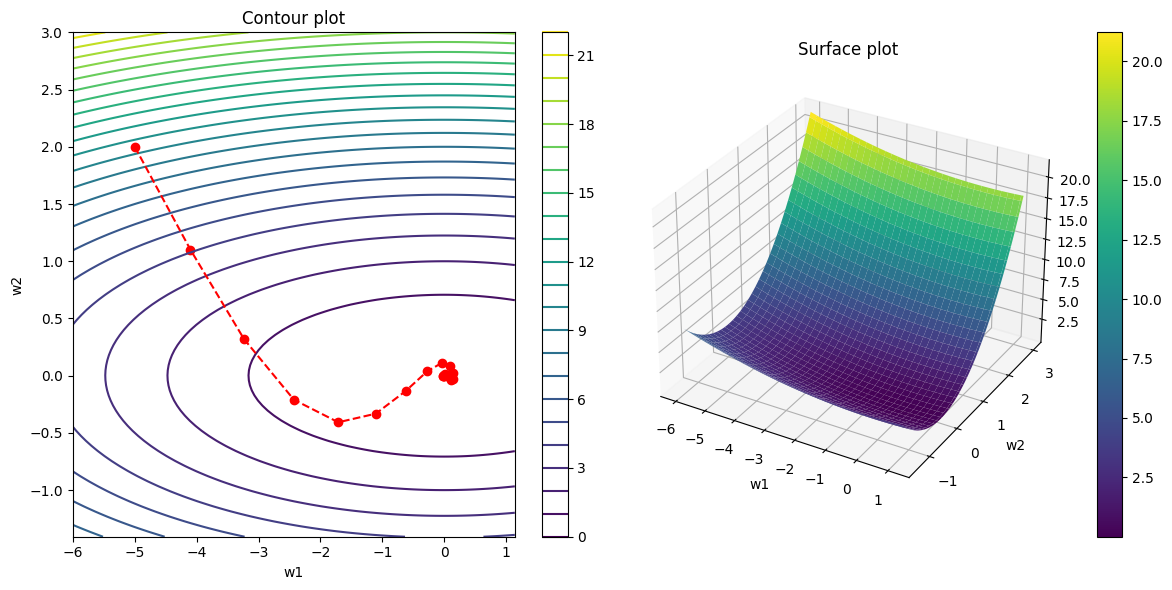

Optimizer stopped at w = (-0.00644, 0.00080).


In [ ]:
# Implements Adam
def adam(init, lr=0.5, beta_1=0.9, beta_2=0.999, iterations=20, epsilon=1e-6):
    w = np.array(init)
    v = np.zeros(2)
    s = np.zeros(2)
    path = [w]

    for i in range(iterations):
        grad = gradl(w)

        v = beta_1 * v + (1 - beta_1) * grad
        s = beta_2 * s + (1 - beta_2) * (grad**2)

        v_hat = v / (1 - beta_1**(i + 1))
        s_hat = s / (1 - beta_2**(i + 1))

        w = w - (lr / (np.sqrt(s_hat) + epsilon)) * v_hat

        path.append(w)

    return np.array(path)

# You can change the following line to try different learning rates and momentum factors
learning_rate = 0.9
beta_1 = 0.5
beta_2 = 0.999

path = adam(init=[-5, 2], lr=learning_rate, beta_1=beta_1, beta_2=beta_2, iterations=20)
plot_path(path)

# Recommended reading

* [Dive into Deep Learning](https://d2l.ai): Chapter 12.

# [Storing this notebook as a `pdf`]


In [1]:
%%capture
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# Set the path to this notebook below (add \ before spaces). The output `pdf` will be stored in the corresponding folder.
!jupyter nbconvert --to pdf /content/gdrive/My\ Drive/Colab\ Notebooks/nndl/week_08/lecture/01_Optimization_Algorithms.ipynb

# If having issues, save this notebook (File > Save) and restart the session (Runtime > Restart session) before running this cell. To debug, remove the first line (`%%capture`).